In [1]:
# Install the OpenSlide C library and Python bindings
!apt-get install openslide-tools
!pip install openslide-python
!pip install tifffile

!pip install tifffile

#Install libraries
!pip install matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openslide import open_slide
import os
import os.path
from PIL import Image
import math
import cv2
import csv

from tqdm import tqdm

from PIL import Image

E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
^C
Defaulting to user installation because normal site-packages is not writeable


In [3]:
################################################
# Running utilities/stain_norm functions
################################################

# create_dir, read_slide, grays_filter, img_to_rgb, numpy2RGBpil
# isCenterMaskPositive, isPatchNotFullPositive, 

%run utilities.ipynb

In [4]:
####################################################,
# Base directory 
####################################################,

slide_num = '090' 

segmented_patches_dir = 'Results4/' # change for you folder

print(segmented_patches_dir)

Results4/


# Load Slide

In [ ]:
################################################
# Read slide - check slide
################################################

slide_num = '095'

#slide_path = 'tumor_'+ slide_num + '.tif'
tumor_mask_path = 'converted_mask/tumor_' + slide_num + '_mask.tif'

#slide = open_slide(slide_path)
slide = open_slide(tumor_mask_path)

level_to_plot=3

#slide_image = read_slide(slide, 
#                          x=0, 
#                          y=0, 
#                          level=level_to_plot,
#                          width=slide.level_dimensions[level_to_plot][0], 
#                          height=slide.level_dimensions[level_to_plot][1])

mask_image = read_slide(slide, 
                          x=0, 
                          y=0, 
                          level=level_to_plot,
                          width=slide.level_dimensions[level_to_plot][0], 
                          height=slide.level_dimensions[level_to_plot][1])

plt.figure(figsize=(5,5)) # specifying the overall grid size

#plt.subplot(1,2,1) # Number of images in the grid is 1*2 (1 line x 2 column + position on the grid)
#plt.imshow(slide_image)

#plt.subplot(1,2,2)    
plt.imshow(mask_image)

plt.show()

In [7]:
################################################
# Patch configs and BASIC CONFIGS
################################################

level_of_the_output = 3 # Level of the dataset used to train the model
patch_size = 224 # patch_size
itemSizeInPixels = patch_size

widthInPixels = slide.level_dimensions[level_of_the_output][0]
heightInPixels = slide.level_dimensions[level_of_the_output][1]

size_x = math.floor(widthInPixels/patch_size) + 1
size_y = math.floor(heightInPixels/patch_size) + 1 # round down

def read_img(IMAGE_NAME, DIR):
    read = lambda imname: np.asarray(Image.open(imname))
    PATH = os.path.join(DIR,IMAGE_NAME)
    img = read(PATH)
    return img

print("widthInPixels =", widthInPixels)
print("heightInPixels =", heightInPixels)
print("size_x, size_y =", size_x, size_y)

widthInPixels = 20992
heightInPixels = 13440
size_x, size_y = 94 61


# Load Segmentation from Patches

100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 524.56it/s]


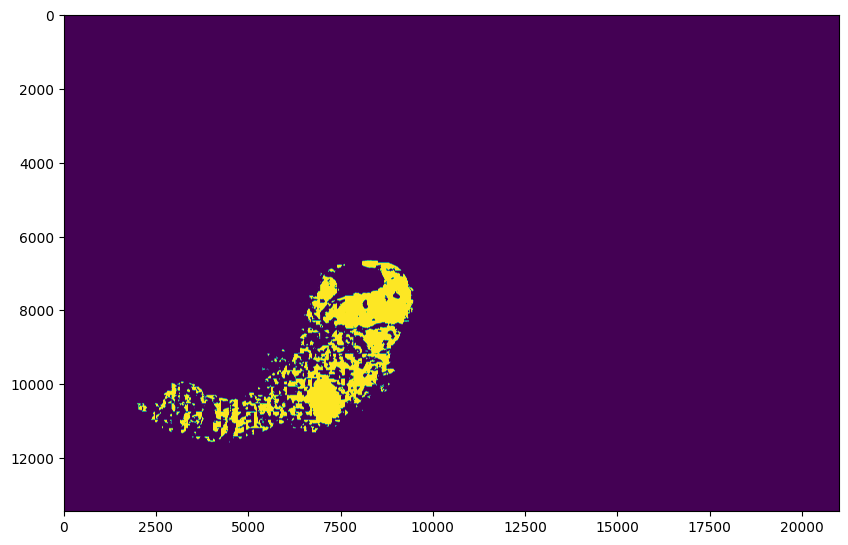

In [8]:
#segmented_output_image = np.zeros((size_y * patch_size, size_x * patch_size), dtype=np.uint8)
segmented_output_image = np.zeros((heightInPixels, widthInPixels), dtype=np.uint8)

for x in tqdm(range(size_x)):
    for y in range(size_y):
        patch_name = slide_num + "_" + str(y) + "_" + str(x) + ".jpg"
        
        try:
            image = read_img(patch_name, segmented_patches_dir)
            columnStartPixelPosition = x * itemSizeInPixels
            columnEndPixelPosition = columnStartPixelPosition + (itemSizeInPixels)
            rowStartPixelPosition = y * itemSizeInPixels
            rowEndPixelPosition = rowStartPixelPosition + (itemSizeInPixels)
            #segmented_output_image[rowStartPixelPosition:rowEndPixelPosition,columnStartPixelPosition:columnEndPixelPosition] = image
            segmented_output_image[rowStartPixelPosition:rowEndPixelPosition,columnStartPixelPosition:columnEndPixelPosition] = (~image.astype(bool)).astype(int)
        except Exception:
            #print('e', patch_name)
            #raise Exception
            pass
        
        #segmented_output_image[rowStartPixelPosition:rowEndPixelPosition,columnStartPixelPosition:columnEndPixelPosition] = (~image.astype(bool)).astype(int)
        

plt.figure(figsize=(10,10)) 
plt.imshow(segmented_output_image)

In [9]:
################################################
# Resizing output to check the plot of the segmented full outout againt the Ground truth mask
# The resize is made because is easy to plot in level 7 or higher, thus it does not take to much time/RAM 
# It is just made for for a quicky check agaist the groud truth mask/slide image.
################################################

resizedWidth = slide.level_dimensions[level_to_plot][0]
resizedHeight = slide.level_dimensions[level_to_plot][1]

resized_segmented_output_image = cv2.resize(segmented_output_image, dsize=(resizedWidth, resizedHeight), interpolation=cv2.INTER_CUBIC)


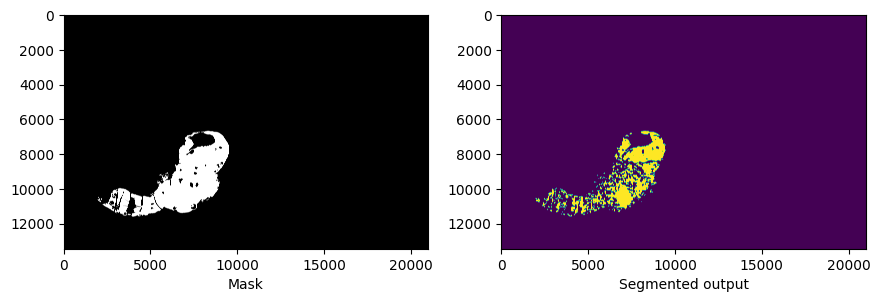

In [10]:
################################################
# Plotting Slide, GroundTruth Mask adn Output
################################################

plt.figure(figsize=(16,14)) 

#plt.subplot(1,3,1) 
#plt.imshow(slide_image)
#plt.xlabel("Slide")    

plt.subplot(1,3,2)    
plt.imshow(mask_image)
plt.xlabel("Mask")    

plt.subplot(1,3,3)    
plt.imshow(resized_segmented_output_image)
plt.xlabel("Segmented output") 

plt.show()


## Viz

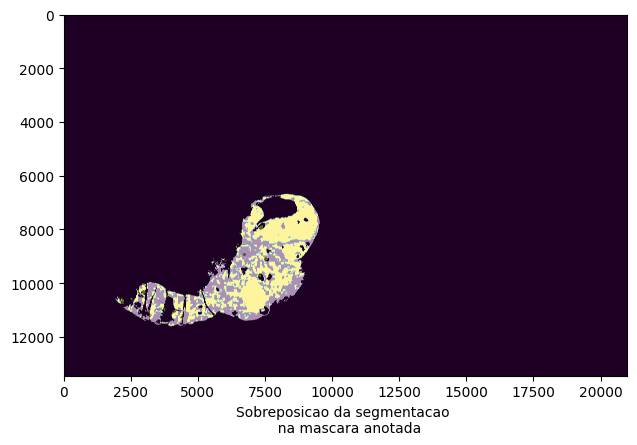

In [11]:
################################################
# Output mask x GroundTruth Mask
################################################

plt.figure(figsize=(16,14)) 

#plt.subplot(1,2,1) 
#plt.imshow(slide_image)
#plt.imshow(mask_image, cmap='viridis', alpha=0.44)
#plt.xlabel("Sobreposicao da mascara anotada \n  no slide original imagem")     

plt.subplot(1,2,2)    
plt.imshow(mask_image)
plt.imshow(resized_segmented_output_image, cmap='viridis', alpha=0.44)
plt.xlabel("Superposition of segmentation \n  over annotated mask")  

plt.show()


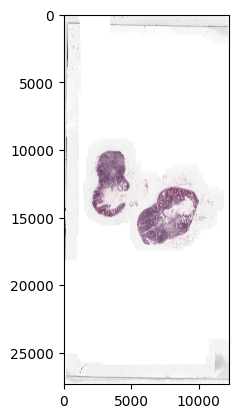

In [42]:
slide_path = 'original/test_038.tif'
slide = open_slide(slide_path)
level_to_plot=3

slide_image = read_slide(slide, 
                          x=0, 
                          y=0, 
                          level=level_to_plot,
                          width=slide.level_dimensions[level_to_plot][0], 
                          height=slide.level_dimensions[level_to_plot][1])
plt.imshow(slide_image)
plt.show()

In [44]:
del slide

# Reconstruct

In [7]:
%matplotlib inline

100%|█████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 1046.36it/s]


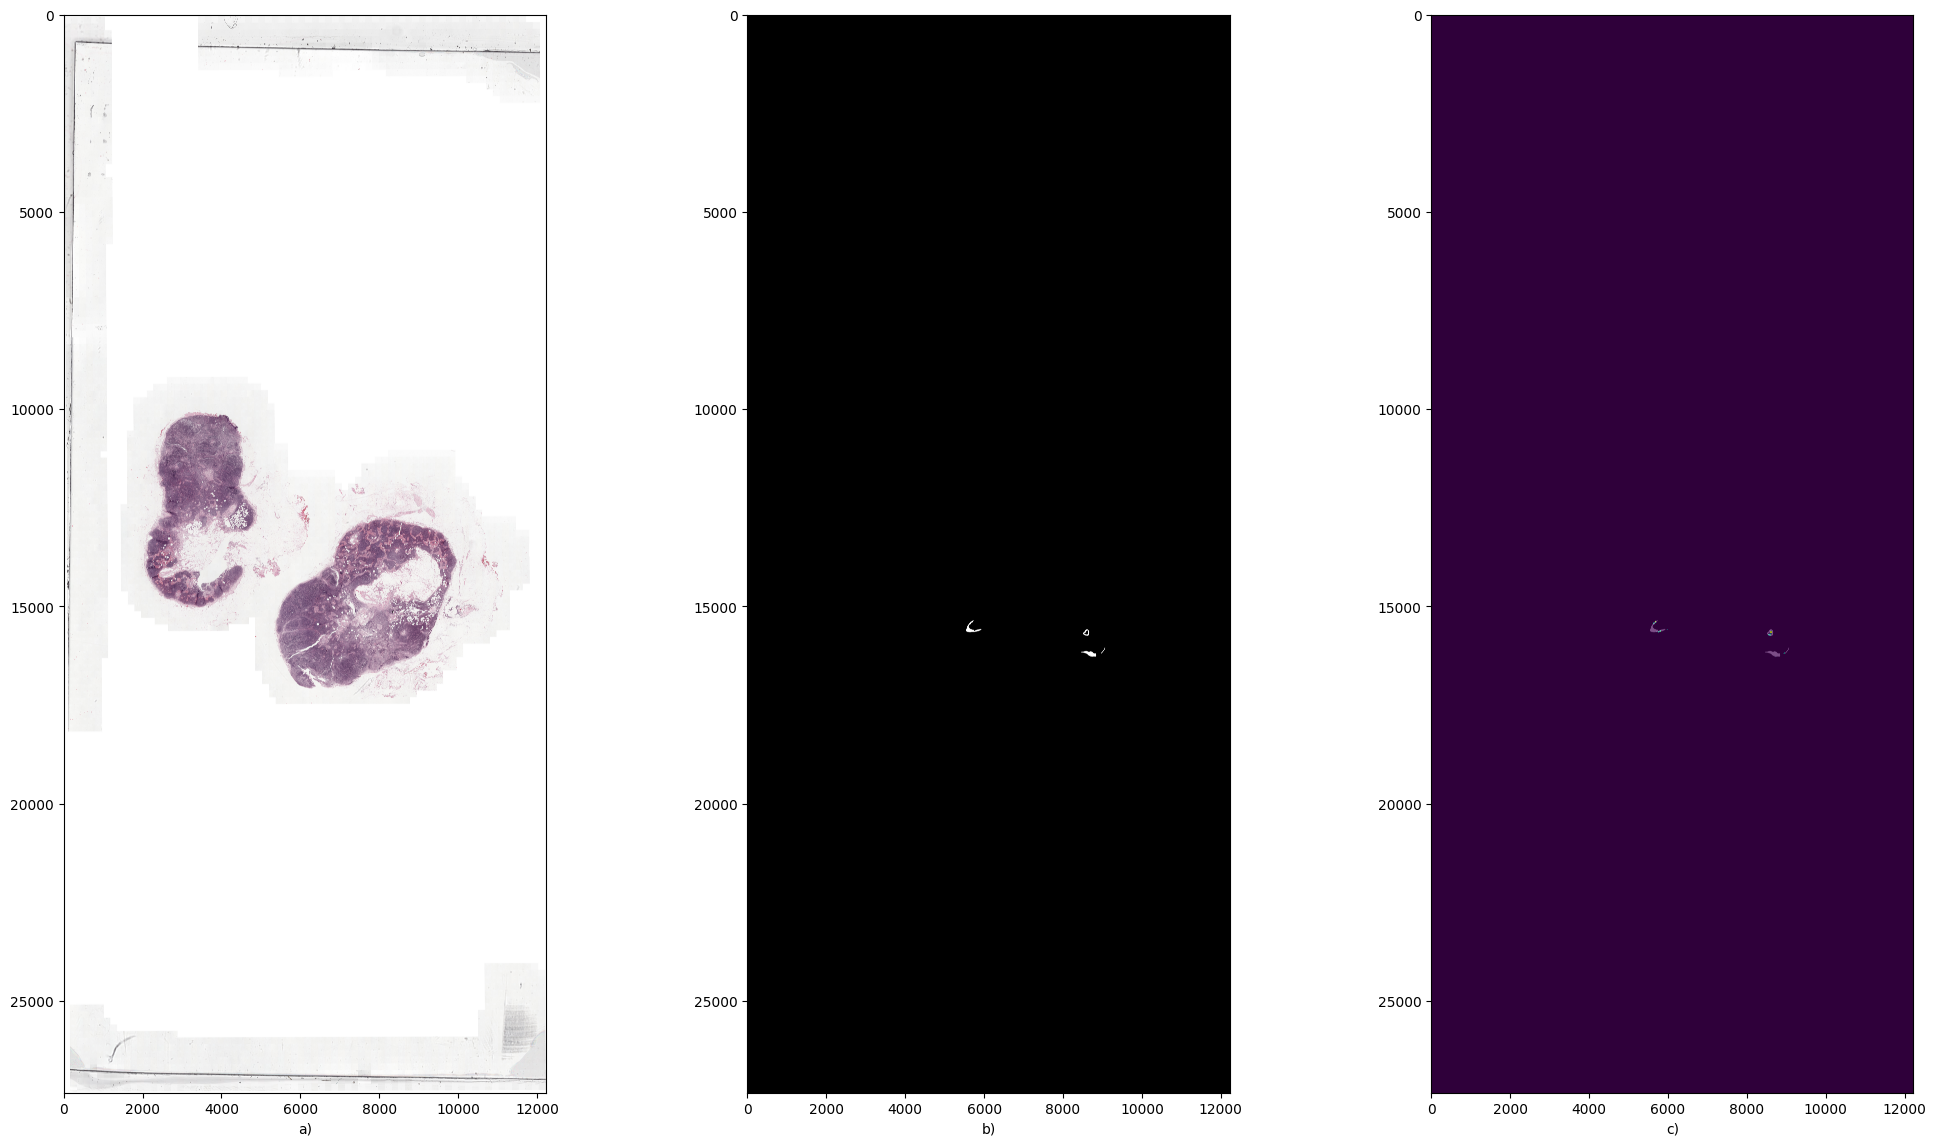

In [8]:
def read_img(IMAGE_NAME, DIR):
    read = lambda imname: np.asarray(Image.open(imname))
    PATH = os.path.join(DIR,IMAGE_NAME)
    img = read(PATH)
    return img
def maskImg(img, threshold, threshold2):
    mask = img.copy()
    mask[mask <= threshold] = 0.0#np.nan
    mask[mask >= threshold2] = 1.0#np.nan
    return mask

segmented_patches_dir = 'Results4/'
original_patches_dir = 'segmentation_without_full_positive_center112_level3_test_slides/image/img/'
#segmented_patches_dir = 'Results2/'
#original_patches_dir = 'segmentation_with_full_positive_center112_level3/image/img'

#slide_numers = ['090','092','093','094','095','096','097','098','099','100','101','102','103','104','105','106','107','108','109','110']

slide_numers = ['027','030','038','051','061','064','068','074','075','082','097','104','108','110','117','121']
exceptions = ['027_72_32','027_71_32','027_70_32','027_70_33',
              '068_91_19','068_91_22','068_91_23','068_92_20','068_92_21','068_92_22','068_92_23','068_92_24','068_93_20','068_93_21','068_93_22','068_93_23','068_93_24','068_93_25','068_93_26','068_94_20','068_94_21','068_94_22','068_94_24','068_94_25','068_94_26','068_95_21','068_95_22','068_95_23','068_95_25','068_95_26','068_96_26',
             '075_78_23','075_78_39','075_76_40',
             '082_55_22',
             '104_85_34',
             '108_84_21']
for slide_num in slide_numers:
    if slide_num != '038': # 51
        continue
    #tumor_mask_path = 'converted_mask/tumor_' + slide_num + '_mask.tif'
    tumor_mask_path = 'converted_mask_testing_images/tumor_' + slide_num + '_mask.tif'
    original_slide_path = 'original/test_'+slide_num+'.tif'
    
    original_slide = open_slide(original_slide_path)
    slide = open_slide(tumor_mask_path)
    
    level_to_plot=3
    original_image = read_slide(original_slide, 
                              x=0, 
                              y=0, 
                              level=level_to_plot,
                              width=slide.level_dimensions[level_to_plot][0], 
                              height=slide.level_dimensions[level_to_plot][1])
    mask_image = read_slide(slide, 
                              x=0, 
                              y=0, 
                              level=level_to_plot,
                              width=slide.level_dimensions[level_to_plot][0], 
                              height=slide.level_dimensions[level_to_plot][1])

    level_of_the_output = 3 # Level of the dataset used to train the model
    patch_size = 224 # patch_size
    itemSizeInPixels = patch_size

    widthInPixels = slide.level_dimensions[level_of_the_output][0]
    heightInPixels = slide.level_dimensions[level_of_the_output][1]

    size_x = math.floor(widthInPixels/patch_size) + 1
    size_y = math.floor(heightInPixels/patch_size) + 1 # round down

    #segmented_input_image = np.ones((heightInPixels, widthInPixels, 3), dtype=np.uint8) * 225
    segmented_output_image = np.zeros((heightInPixels, widthInPixels), dtype=np.uint8)

    for x in tqdm(range(size_x)):
        for y in range(size_y):
            patch_name = slide_num + "_" + str(y) + "_" + str(x) + ".jpg"

            columnStartPixelPosition = x * itemSizeInPixels
            columnEndPixelPosition = columnStartPixelPosition + (itemSizeInPixels)
            rowStartPixelPosition = y * itemSizeInPixels
            rowEndPixelPosition = rowStartPixelPosition + (itemSizeInPixels)
            
            try:
                #if segmented_patches_dir+patch_name == 'Results3/090_11_22.jpg':
                #    print('vai')
                image = read_img(patch_name, segmented_patches_dir)
                segmented_output_image[rowStartPixelPosition:rowEndPixelPosition,columnStartPixelPosition:columnEndPixelPosition] = image
                #print(original_patches_dir+patch_name)
                #image_original = read_img(patch_name, original_patches_dir)
                #print(image_original.shape)
                #segmented_input_image[rowStartPixelPosition:rowEndPixelPosition,columnStartPixelPosition:columnEndPixelPosition,:] = image_original
                #print(patch_name, image.shape)
                #segmented_output_image[rowStartPixelPosition:rowEndPixelPosition,columnStartPixelPosition:columnEndPixelPosition] = (~image.astype(bool)).astype(int)
            except Exception:
                patch_name = slide_num + "_" + str(y) + "_" + str(x)
                if patch_name in exceptions:
                    segmented_output_image[rowStartPixelPosition:rowEndPixelPosition,columnStartPixelPosition:columnEndPixelPosition] = np.ones((itemSizeInPixels, itemSizeInPixels), dtype=np.uint8)
                #print('e', patch_name)
                #raise Exception
                pass

    plt.figure(figsize=(25,14))
    plt.subplot(1,3,1)    
    plt.imshow(original_image)
    #plt.imshow(mask_image)
    plt.xlabel("a)")    
    plt.subplot(1,3,2)
    plt.imshow(mask_image)
    plt.xlabel("b)")
    plt.subplot(1,3,3)    
    #plt.imshow(original_image)
    plt.imshow(mask_image)
    plt.imshow(maskImg(segmented_output_image, 0.0, 1.0), cmap='viridis', alpha=0.70)
    plt.xlabel("c)")  
    #plt.show()
    plt.savefig("original/out_"+slide_num+".pdf", format="pdf", bbox_inches='tight')

    # resize
    #size = (1280, 1024)
    #mask_image_small = cv2.resize(mask_image, dsize=size, interpolation=cv2.INTER_CUBIC)
    #seg_output_small = cv2.resize(segmented_output_image, dsize=size, interpolation=cv2.INTER_CUBIC)
    
    #im = Image.fromarray(seg_output_small)
    #im.save('ResultsReconstructed2/'+slide_num+'_small.png')
    #im = Image.fromarray(mask_image_small)
    #im.save('ResultsReconstructed2/'+slide_num+'_mask_small.png')
    #print('FOI', slide_num)

    #with open('ResultsReconstructed5/'+slide_num+'.npy', 'wb') as f:
    #    np.save(f, segmented_output_image)

In [18]:
size = (1920, 1080)
mask_image_small = cv2.resize(mask_image, dsize=size, interpolation=cv2.INTER_CUBIC)
seg_output_small = cv2.resize(segmented_output_image, dsize=size, interpolation=cv2.INTER_CUBIC)

In [ ]:
plt.figure(figsize=(16,14)) 
plt.imshow(mask_image_small)
plt.imshow(seg_output_small, cmap='viridis', alpha=0.44)
plt.xlabel("Superposition of segmentation \n  over annotation mask")

# Saving

In [19]:
im = Image.fromarray(seg_output_small)
im.save('ResultsReconstructed2/'+slide_num+'_small.png')
im = Image.fromarray(mask_image_small)
im.save('ResultsReconstructed2/'+slide_num+'_mask_small.png')

In [164]:
im = Image.fromarray(resized_segmented_output_image)
im.save('ResultsReconstructed2/'+slide_num+'.png')

In [167]:
im = Image.fromarray(mask_image)
im.save('ResultsReconstructed2/'+slide_num+'_mask.png')

# Convert to CSV map for FROC evaluation

In [151]:
hei = resized_segmented_output_image.shape[0]
wid = resized_segmented_output_image.shape[1]

with open('ResultsCSV2/'+slide_num+'.csv', 'w+', newline='') as file:
    writer = csv.writer(file)
    #writer.writerow(["Confidence", "X coordinate", "Y coordinate"])
    
    for y in range(hei):
        for x in range(wid):
            if resized_segmented_output_image[y][x] > 0:
                writer.writerow([resized_segmented_output_image[y][x], x, y])